#Week 2 Exercises

In this weeks exercises you will use Numpy/Scipy to impliment some numerical algorithms and then you will use Pandas to perform a rudamentary data analysis using the KDD 98 dataset.  Along the way you will use unix/basic python from the first week as well as git to save your work.

As a first step we import the libraries we'll use later on.  This allows us to use numpy library calls by prefixing the call with np.

In [2]:
#Import the libraries 
import numpy as np
import scipy as sp
import pandas as pd

##Matrix Manipulations
Lets first create a matrix and perform some manipulations of it.

Using numpy's matrix data structure, define the following matricies:

$$A=\left[ \begin{array}{ccc} 3 & 5 & 9 \\ 3 & 3 & 4 \\ 5 & 9 & 17 \end{array} \right]$$

$$B=\left[ \begin{array}{c} 2 \\ 1 \\ 4 \end{array} \right]$$

After this solve the matrix equation:
$$Ax = B$$

Now write three functions for matrix multiply $C=AB$ in each of the following styles:

1. By using nested for loops to impliment the naive algorithm ($C_{ij}=\sum_{k=0}^{m-1}A_{ik}B_{kj}$)
2. Using numpy's built in martrix multiplication  
3. Using Cython

The three methods should have the same answer

In [14]:
print ("Problem 1 \n")
# 3x3 matrix
A = np.array([[3,5,9],
              [3,3,4],
              [5,9,17]])
# 3x1 matrix
B = np.array([[2],
              [1],
              [4]])

def matrix_Mult(x,y):
    x=np.array(x)
    y=np.array(y)        
    z=[]
    #Number of rows in x is equal to the number of rows in y
    for xj in range(x.shape[0]):            
        #Repeat operation for each column of y
        row=[]
        for yi in range(y.shape[1]):
            row.append(np.sum(x[xj]*y[:,yi]))
        z.append(row)
    return z

A=[[3,5,9],[3,3,4],[5,9,17]]
B=[[2],[1],[4]]
print (matrix_Mult(A,B))

def numpy_dot(x,y):
    return np.dot(x,y)

print ("\nProblem 2 \n")
print(numpy_dot(A,B))

Problem 1 

[[47], [25], [87]]

Problem 2 

[[47]
 [25]
 [87]]


Now we wish to evaluate the performance of these three methods.  Write a method that given three dmiensions (a,b,c) makes a random a x b and b x c matrix and computes the product using your three functions and reports the speed of each method.

After this measure performance of each method for all $a,b,c \in \{10,100,1000,10000\}$ and plot the results.  Is one method always the fastest?  Discuss why this is or is not the case.

In [16]:
def genRand(a,b,c):
    mat1=[[randint(0,9) for i in range(a)] for i in range(b)]
    mat2=[[randint(0,9) for i in range(b)] for i in range(c)]
    return mat1, mat2

loopTime=[]
numpyTime=[]

#Numpy calculations
numpyTime.append(time.time())
print('N1')
A,B=genRand(10,10,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print ('N2')
A,B=genRand(10,100,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print ('N3')
A,B=genRand(10,1000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
print ('N4')
A,B=genRand(10,10000,10)
numpy_dot(A,B)
numpyTime.append(time.time())
numpyTime=np.diff(numpyTime)

#Loop calculations
loopTime.append(time.time())
print ('L1')
A,B=genRand(10,10,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print ('L2')
A,B=genRand(10,100,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print ('L3')
A,B=genRand(10,1000,10)
matrix_Mult(A,B)
loopTime.append(time.time())
print ('L4')
A,B=genRand(10,10000,10)
matrix_Mult(A,B)
loopTime.append(time.time())
loopTime=np.diff(loopTime)

N1
N2
N3
N4
L1
L2
L3
L4


**BONUS** Now repeat the past two problems but instead of computing the matrix product, compute a matrix's [determinant](http://en.wikipedia.org/wiki/Determinant).  Measure performance for matricies of various sizes and discuss the results.  Determinant may get impractical to calculate for not too huge of matricies, so no need to goto 1000x1000 matricies.

             loopTime  numpyTime
1000.0       0.001956   0.001214
10000.0      0.062865   0.405106
100000.0     6.075555   0.050280
1000000.0  563.491288   2.263446


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


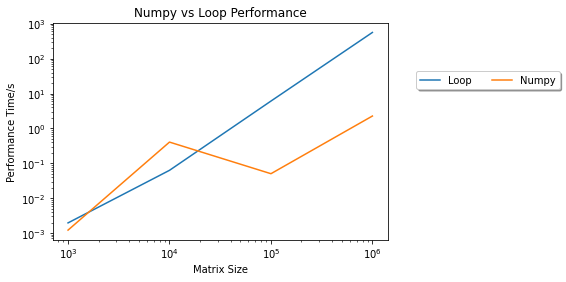

In [17]:
df = pd.DataFrame(data={'loopTime':loopTime,'numpyTime':numpyTime}, )
matSize=[1e3,1e4,1e5,1e6]
df.index = matSize               
print (df)



plt.plot(matSize,loopTime)
plt.plot(matSize,numpyTime)
plt.subplot(111)
plt.xscale('log')
#plt.legend?
plt.legend(['Loop','Numpy'],loc='upper center', bbox_to_anchor=(1.3, .8),ncol=3, fancybox=True, shadow=True)
plt.yscale('log')
plt.xlabel('Matrix Size')
plt.ylabel('Performance Time/s')
plt.title('Numpy vs Loop Performance')
plt.show()

In [18]:
dict_file = open("dict.dat")
col_types = [ (x.split("\t")[0], x.strip().split("\t")[1]) for x in dict_file.readlines() ]

In [20]:
learn=pd.DataFrame(col_types, columns=['Head','Type'])
dict_file.close()
learn_x=learn[learn['Head'].isin(['TARGET_B','TARGET_D'])]
learn_y=learn[np.logical_not(learn['Head'].isin(['TARGET_B','TARGET_D']))]
print (learn_x)
print (learn_y)

         Head Type
470  TARGET_B  Num
471  TARGET_D  Num
         Head  Type
0     ODATEDW   Num
1     OSOURCE  Char
2       TCODE   Num
3       STATE  Char
4         ZIP  Char
..        ...   ...
476  MDMAUD_R  Char
477  MDMAUD_F  Char
478  MDMAUD_A  Char
479  CLUSTER2   Num
480  GEOCODE2  Char

[479 rows x 2 columns]


###Summarizing Data
Now that we have loaded data into the learn table, we wish to to summarize the data.  
Write a function called summary which takes a pandas data frame and prints a summary of each column containing the following:

If the column is numeric:

1. Mean
2. Standard Deviation
3. Min/Max
4. Number of missing values (NaN, Inf, NA)

If the column is non alphabetical:

1. Number of distinct values
2. Number of missing values (NaN, INF, NA, blank/all spaces)
3. The frequency of the 3 most common values and 3 least common values

Format the output to be human readable.

For example:
> Field_1  
> mean: 50  
> std_dev: 25  
> min: 0  
> max: 100  
> missing: 5
>  
> Field_2  
> distinct_values: 100  
> missing: 10  
>  
> 3 most common:  
>   the: 1000  
>   cat: 950  
>   meows: 900  
>  
> 3 least common:  
>   dogs: 5  
>   lizards: 4  
>   eggs: 1  

 ### Pandas analysis on Calit2 data 

Import data from http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data using curl

This data comes from the main door of the CalIt2 building at UCI. Observations come from 2 data streams (people flow in and out of the building), over 15 weeks, 48 time slices per day (half hour count aggregates).

Attribute Information:
1. Flow ID: 7 is out flow, 9 is in flow
2. Date: MM/DD/YY
3. Time: HH:MM:SS
4. Count: Number of counts reported for the previous half hour


In [21]:
import pandas as pd
! curl -O http://archive.ics.uci.edu/ml/machine-learning-databases/event-detection/CalIt2.data 
info = []
CalIt_data= open('CalIt2.data')
for line in CalIt_data:
    info.append(line.rstrip('\n').split(',')) # rstrip removes the endline
#calit2_dataFrame = pd.DataFrame(data = info, columns=['Flow ID', 'Date', 'Time', 'Count'])   
CalIt_data.close()
#selectingDataQ2 = calit2_dataFrame
#calit2_Copy = calit2_dataFrame
calit2_dataFrame = pd.DataFrame(data = info, columns=['Flow ID', 'Date', 'Time', 'Count'])   
CalIt_data.close()

#

date_select= calit2_dataFrame['Date'] == '07/24/05'
flowID_select = calit2_dataFrame['Flow ID'] == '7'
### 1. 
selecting_data1 = calit2_dataFrame[date_select & flowID_select]

print ('Selecting Data: Problem 1: {0} rows'.format(len(selecting_data1)))
selecting_data1.head(10)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218k  100  218k    0     0   209k      0  0:00:01  0:00:01 --:--:--  209k
Selecting Data: Problem 1: 48 rows


,Flow ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
4,7,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0
10,7,07/24/05,02:30:00,2
12,7,07/24/05,03:00:00,0
14,7,07/24/05,03:30:00,0
16,7,07/24/05,04:00:00,0
18,7,07/24/05,04:30:00,0


#### Selecting Data ####
1. Select all data for the date July 24 2005 having flow id=7. Also output the row count of results 
2. Select all rows whose count is greater than 5. Sort the result on count in descending order and output the top 10 rows

In [24]:
## Selecting Data 2. 
count_select = calit2_dataFrame['Count'] > '5'
selecting_data2 = calit2_dataFrame[count_select].sort_values('Count', ascending=False)
print ('Selecting Data: Problem 2:')
selecting_data2.head(10)
#calit2_dataFrame[(calit2_dataFrame['Date'] == '07/24/05')]

Selecting Data: Problem 2:


,Flow ID,Date,Time,Count
1110,7,08/04/05,13:30:00,9
1582,7,08/09/05,11:30:00,9
4456,7,09/08/05,10:00:00,9
4458,7,09/08/05,10:30:00,9
6870,7,10/03/05,13:30:00,9
4465,9,09/08/05,12:00:00,9
1502,7,08/08/05,15:30:00,9
6866,7,10/03/05,12:30:00,9
4478,7,09/08/05,15:30:00,9
1509,9,08/08/05,17:00:00,9


#### Apply function ####
1. For the 10 rows outputted above, use Pandas Apply function to subtract lowest value of the 10 from all of them and then output the average value of the resulting counts
2. On the entire data, use apply function to sum all counts with flow_id=9 and date is 07/24/05

In [25]:
apply_function_1 = selecting_data2.head(10)
apply_function_2 = apply_function_1.Count.apply(lambda x: float(x))
min_Count = float(apply_function_1.Count.min())
apply_function_1 = apply_function_1.Count.apply(lambda x: float(x) - min_Count).mean()
print('Apply Function: Problem 1: {0}'.format(apply_function_1))
#calit2_dataFrame
date_select= calit2_dataFrame['Date'] == '07/24/05'
flowID_select = calit2_dataFrame['Flow ID'] == '9'


calit2_dataFrame = calit2_dataFrame[date_select & flowID_select]

calit2_dataFrame.Count = calit2_dataFrame.Count.apply(lambda x: float(x))
print ('Apply Function: Problem 12: {0}'.format(np.sum(calit2_dataFrame.Count.values.tolist())))

Apply Function: Problem 1: 0.0
Apply Function: Problem 12: 16.0


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### Indexing an Selecting ####
Exlain the following

1. loc: 
2. iloc:
3. ix:
4. at:
5. iat:

Highlight the differences by providing usecases where one is more useful than the other


Write a function to take two dates as input and return all flow ids and counts in that date range having both the dates inclusive. You can use pandas to_datetime function to convert the date to pandas datetime format 

#### Grouping ####
1. Select data in the month of August 2005 having flow id=7
2. Group the data based on date and get the max count per date

In [27]:
id_condition = calit2_dataFrame['Flow ID'] == 7
part_date_condition = calit2_dataFrame.Date.str.startswith('08')
part2_date_condition = calit2_dataFrame.Date.str.endswith('05')
date_condition = part_date_condition & part2_date_condition
grouping_1 = calit2_dataFrame[id_condition & date_condition]
print (grouping_1)


g2 = grouping_1.groupby('Date')
print (g2.max())

Empty DataFrame
Columns: [Flow ID, Date, Time, Count]
Index: []
Empty DataFrame
Columns: [Flow ID, Time, Count]
Index: []


#### Stacking, Unstacking ####
1. Stack the data with count and flow_id as indexes
2. Use reset_index to reset the stacked hierarchy by 1 level. The index then will just be the counts
3. Unstack the data to get back original data

In [30]:
stack1 = calit2_dataFrame.set_index(['Count', 'Flow ID']).stack()
print ("Stacking 1. \n")
stack1



Stacking 1. 



Count  Flow ID      
0.0    9        Date    07/24/05
                Time    00:00:00
                Date    07/24/05
                Time    00:30:00
                Date    07/24/05
                          ...   
                Time    22:30:00
                Date    07/24/05
                Time    23:00:00
                Date    07/24/05
                Time    23:30:00
Length: 96, dtype: object

#### Pandas and Matplotlib

Plot a histogram of date vs total counts for flow_id=7 and flow_id=9 for the month of July 2005

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0, 0.5, '# of Visitors')

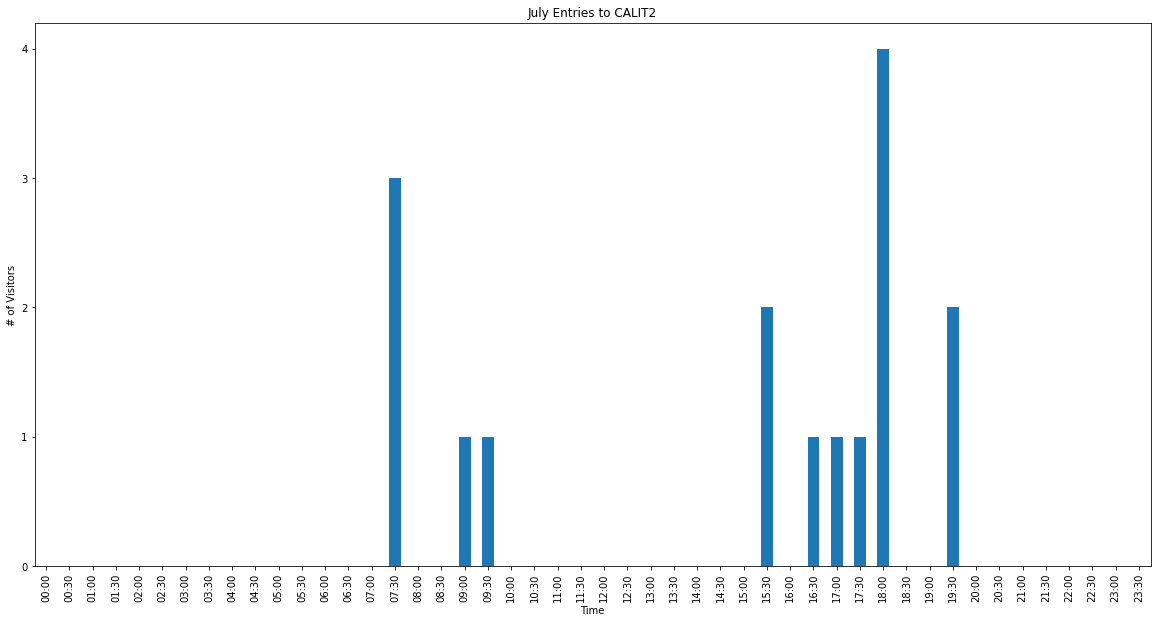

In [31]:
mask = (calit2_dataFrame['Date'] >= '07/01/05') & (calit2_dataFrame['Date'] <= '07/31/05')
#& (df['date'] <= '2000-6-10')
#print np.shape((calit2_dataFrame.loc[mask]))
calit2_dataFrame = calit2_dataFrame.loc[mask]
#np.nansum(calit2_dataFrame['Count'])
#df.hist(layout=(1,2))
timeCount_df = calit2_dataFrame[['Time','Count']]
timeCount_df['Time'] = timeCount_df['Time'].apply(lambda x: x[:5])
ax = timeCount_df.plot(x='Time', y='Count', kind='bar', legend=False, figsize=(20, 10), title='July Entries to CALIT2')

ax.yaxis.set_ticks(np.arange(0, 5, 1.0))
ax.set_ylabel("# of Visitors")